In [6]:
import pandas as pd
df = pd.read_csv('data/perch_full.csv')

#2차원 배열로 변환
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
#훈련세트와 테스트세트로 나눈다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

#### 특성공학 실시

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#사이킷런의 변환기 클래스 적용
poly = PolynomialFeatures() #객체 생성
poly.fit([[2, 3]]) #2차원 데이터 삽입, 어떤 숫자를 넣어도 상관없음
print(poly.transform([[2, 3]])) #transform() : 표준점수 만들기 -> 규제에서 모델 사용시, 표준화 사용 권장

[[1. 2. 3. 4. 6. 9.]]


In [14]:
poly = PolynomialFeatures(include_bias = False) #1 포함하지 않도록 False 처리
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [15]:
train_input.shape

(42, 3)

In [16]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape #변환된 크기 확인

(42, 9)

In [17]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [19]:
#테스트 세트 변환
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [20]:
#다중 회귀모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982125

In [21]:
lr.score(test_poly, test_target)

0.9714559911594155

#### 규제

In [23]:
#과대적합 일부러 만들기
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape, test_poly.shape

((42, 55), (14, 55))

In [24]:
#훈련 및 정확도 검사
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999938143

In [26]:
lr.score(test_poly, test_target) #출력결과 = 과대적합모델

-144.40744532797535

In [27]:
#규제
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) #훈련데이터로만 학습(타겟데이터 넣지 않음)

train_scaled = ss.transform(train_poly) #표준점수 변환
test_scaled = ss.transform(test_poly)   #표준점수 변환

In [28]:
#릿지회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) #표준화된 훈련데이터, 훈련타겟으로 학습
ridge.score(train_scaled, train_target) #점수확인

0.9896101671037343

In [29]:
ridge.score(test_scaled, test_target) #표준화된 테스트데이터, 테스트타깃의 점수 확인

0.979069397761539

In [34]:
#alpha 값 조절
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [35]:
for alpha in alpha_list:
    #릿지 모델을 만듭니다
    ridge = Ridge(alpha = alpha) #for문을 돌면서 릿지객체 생성과 동시에 알파값을 넣어줌
                                 #알파값이 크면 규제가 더 되는 것
    #릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

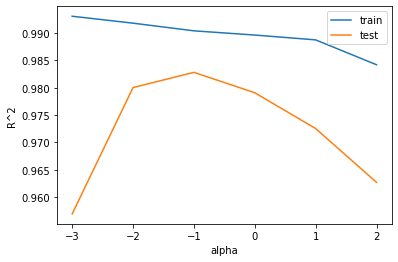

In [36]:
#그래프 출력
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.legend() #범례 출력
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [37]:
ridge = Ridge(alpha = 0.1) #가장 간격이 작은 때를 넣는다
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target)) #훈련점수
print(ridge.score(test_scaled, test_target)) #테스트점수

0.9903815817570369
0.9827976465386932


In [44]:
#라쏘회귀
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target) #훈련점수 확인

0.989789897208096

In [45]:
print(lasso.score(test_scaled, test_target)) #테스트 점수 확인

0.9800593698421884


In [47]:
import warnings #오류메세지 보이지 않도록 추가
warnings.filterwarnings(action = 'ignore')

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha = alpha, max_iter = 10000) #반복횟수 지정해야함
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

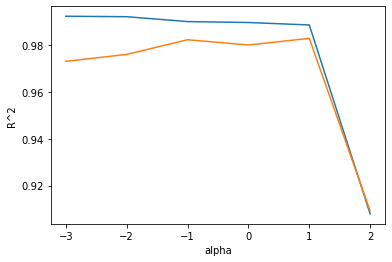

In [48]:
#그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [49]:
#테스트
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [51]:
np.sum(lasso.coef_ == 0) #0으로 만드는 이유 : 특성을 없애주면 과대적합을 줄일 수 있으므로
                         #True의 합계

40